# 1. Data Selection
In this initial step, we employ the pandas library to import the dataset for analysis. We utilize the read_csv function to load the data from the "Wholesale customers data.csv" file into a pandas DataFrame named df, which provides a structured representation of the data for further processing.



In [ ]:
import pandas as pd
df = pd.read_csv("Wholesale customers data.csv")

# 2. Data Presentation
Here, we examine the initial rows and overall structure of the dataset using df.head() and df.info(). This preliminary exploration helps us gain an overview of the data's contents, including the column names, data types, and potential missing values, enabling us to understand its characteristics and plan subsequent steps.

In [ ]:
print(df.head())
print(df.info())  # Summary of columns and data types

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

# 3. Data Visualization
In this stage, we leverage the power of matplotlib.pyplot and seaborn to visually represent the data. We create a histogram using sns.histplot to visualize the distribution of spending on 'Fresh' products, aiding in understanding the pattern of this specific feature. Additionally, we construct a heatmap using sns.heatmap to illustrate the correlation between numerical columns in the dataset, revealing relationships and potential dependencies between variables.

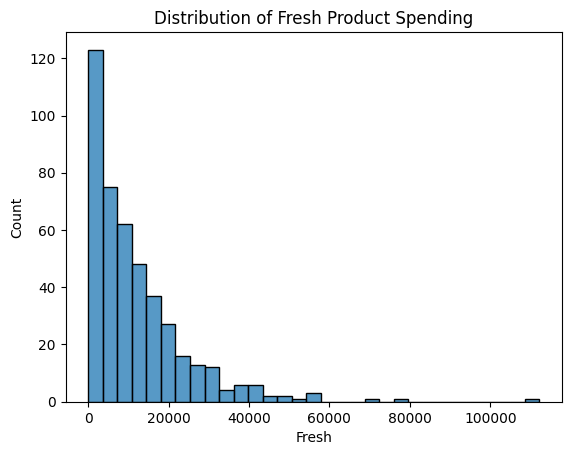

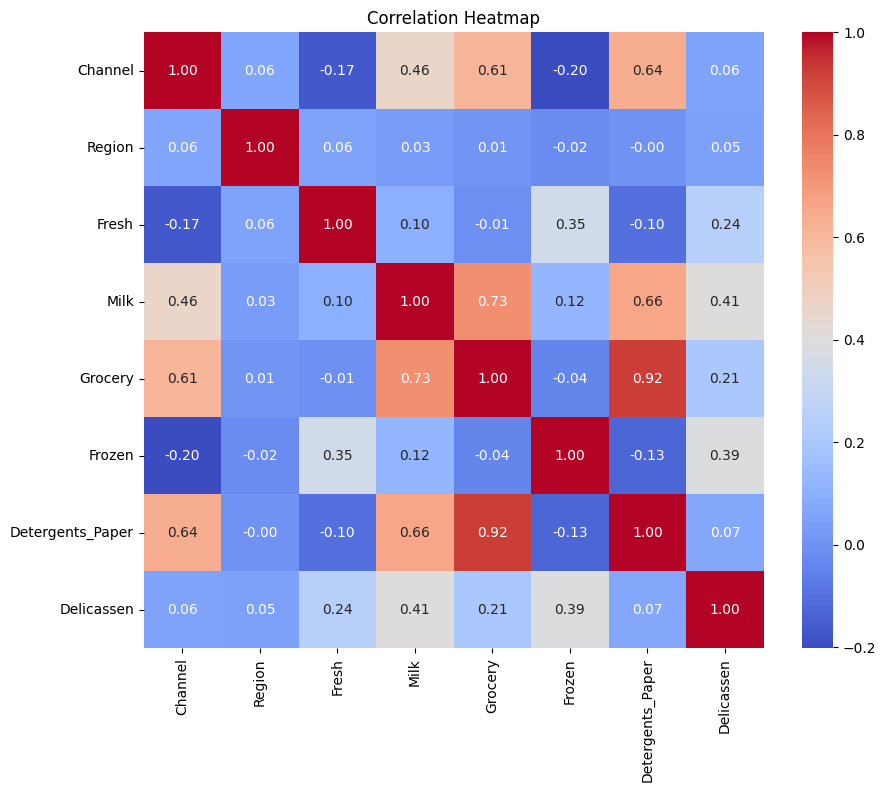

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Example: Distribution of spending on 'Fresh' products
sns.histplot(df['Fresh'])
plt.title("Distribution of Fresh Product Spending")
plt.show()

numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# 4. Data Handling
 In this step, we prepare the data for model training. We utilize scikit-learn's StandardScaler to standardize the numerical features, ensuring they have zero mean and unit variance. This step helps prevent features with larger values from dominating the model and improves its performance.

In [ ]:
df.fillna(method='ffill', inplace=True)


<ipython-input-16-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# 5. Data Split
In this crucial step, we divide the dataset into training and testing subsets. We utilize train_test_split from scikit-learn to randomly split the data, typically with a 70-30 or 80-20 ratio. This division allows us to train the model on a portion of the data and evaluate its performance on unseen data, ensuring its ability to generalize to new instances.

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Channel'], axis=1)  # Features
y = df['Channel']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 6. Model Generation
As previously described, in this step, we utilize the RandomForestClassifier from scikit-learn to create and train a predictive model. We initialize a RandomForestClassifier object and then employ the fit method with training data (X_train, y_train) to learn patterns and build decision trees for prediction.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

# 7. Model Evaluation
 In this phase, we assess the performance of the trained model using the testing data. We employ metrics like accuracy, precision, recall, and F1-score, calculated using predictions generated by the model on X_test and comparing them to the actual values in y_test. This evaluation provides insights into the model's effectiveness and ability to generalize to unseen data.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))


Accuracy: 0.8977272727272727
F1 Score: 0.9006951871657755
Precision: 0.9100378787878789


# 8. Result Analysis
If applicable, this final step involves deploying the trained model for practical use. We might save the model using joblib or pickle and integrate it into an application or system to make predictions on new data. This deployment allows us to leverage the model's insights for real-world decision-making or automation.


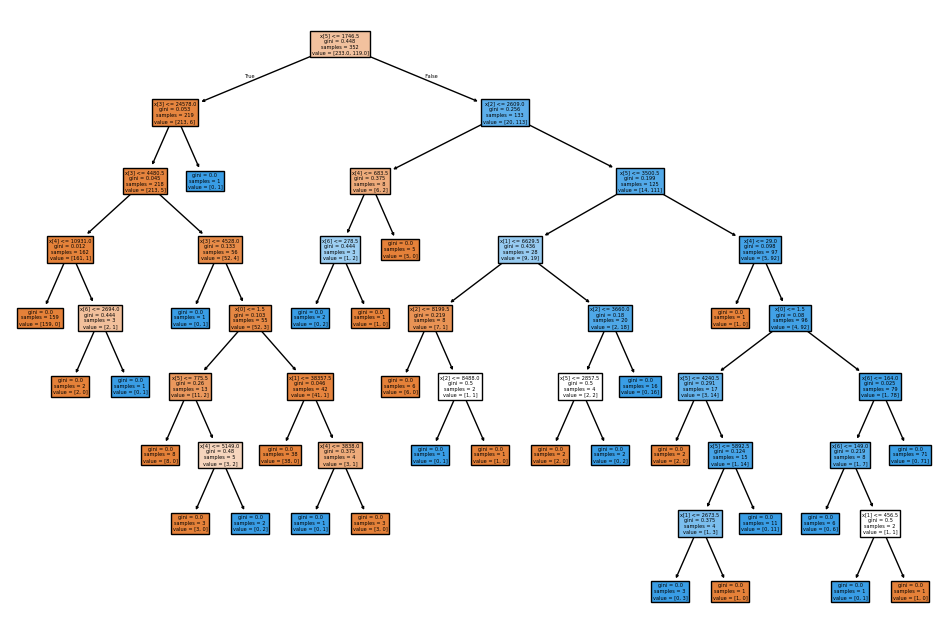

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
plt.figure(figsize=(12,8))
plot_tree(dt_model, filled=True)
plt.show()